Cancer treatments can affect the immune system and its ability to respond to infection. According to the American Cancer Society, cancer treatments like chemotherapy and radiation therapy can cause a decrease in the number of white blood cells and thus decrease the body's capacity to respond to infection. Additionally, targeted therapy and immunotherapy are used to improve the immune system's ability to attack cancer cells, but can compromise their ability to fight off infections. In this analysis, I am looking at how the timing of the cancer treatment or the type of cancer treatment affects the severity of Covid by potentially compromising the immune system and its ability to respond to infection. I am hypothesizing that the closer the cancer treatment was given to COVID-19 infection, the more likely the patients are to have moderate or severe COVID-19 outcomes. I am also hypothesizing that there are more moderate or severe COVID-19 outcomes for individuals that were given BC therapy than compared to those that did not receive treatment during their COVID-19 infection. 

In order to perform this analysis, I first collected the proportion of individuals that had mild, moderate, or severe covid outcomes for each cancer timing. I plotted the individual counts on a bar chart to better visualize the data and then performed a chi squared analysis on the proportions. Since the test statistic is smaller than the critical value for this data set, we fail to reject the null hypothesis and cannot say that there is a link between the timing of the cancer treatment and the covid-19 outcome. Further analysis and studies would have to be done to see how the timing of breast cancer treatment with COVID-19 affects COVID-19 recovery. 

Next, I examined individuals that underwent cyto, targeted, endo, or immuno therapy as well as the proportion of individuals that underwent no breast cancer therapy and calculated the proportion of individuals that had mild, moderate, or severe outcomes for each type of BC therapy. I ploted the individual counts onto a bar chart to better visualize the data and performed a chi squared analysis on the proportions. Since the test statistic is smaller than the critical valu,e we fail to reject the null hypothesis and cannot say that there is a link between the type of breast cancer therapy and the covid-19 outcome for these patients. We would have to conduct a further analysis on the correlation between the type of breast cancer therapy and the covid-19 outcome to see if and what kind of effect there is. 

https://www.cancer.org/cancer/managing-cancer/side-effects/low-blood-counts/infections/why-people-with-cancer-are-at-risk.html

In [10]:
# Creating Dataframe to compare the timing of cancer treatment with the severity of covid-19

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

read_file = pd.read_csv (r'dataset')
read_file.to_csv (r'dataset.csv', index=None)

filepath = "dataset.csv"
dataset_df = pd.read_csv(filepath)

# for col in dataset_df.columns:
#     print(col)

dataset_df.dropna(subset=['der_cancer_tx_timing_v2'], inplace=True)

# new_df = dataset_df["der_cancer_tx_timing_v2"]
# new_df.sample(20)

timing_df = dataset_df[["der_cancer_tx_timing_v2", "severity_of_covid_19_v2"]]

In [11]:
# Calculating proportions at Each Time Point Based on the Value Counts Results

timing_covid_severity = timing_df.groupby(["der_cancer_tx_timing_v2"])["severity_of_covid_19_v2"].value_counts()
print(timing_covid_severity)

zero_to_four_total = 510+188+21
zero_to_four_mil = round(510/zero_to_four_total*100, 2)
zero_to_four_mod = round(188/zero_to_four_total*100, 2)
zero_to_four_sev = round(21/zero_to_four_total*100, 2)
zero_to_four_list = [zero_to_four_mil, zero_to_four_mod, zero_to_four_sev]

one_to_three_total = 51+16+2
one_to_three_mil = round(51/one_to_three_total*100, 2)
one_to_three_mod = round(16/one_to_three_total*100, 2)
one_to_three_sev = round(2/one_to_three_total*100, 2)
one_to_three_list = [one_to_three_mil, one_to_three_mod, one_to_three_sev]

over_three_total = 339+142+27
over_three_mil = round(339/over_three_total*100, 2)
over_three_mod = round(142/over_three_total*100, 2)
over_three_sev = round(27/over_three_total*100, 2)
over_three_list = [over_three_mil, over_three_mod, over_three_sev]

never_total = 40+8+2
never_mil = round(40/never_total*100, 2)
never_mod = round(8/never_total*100, 2)
never_sev = round(2/never_total*100, 2)
never_list = [never_mil, never_mod, never_sev]

der_cancer_tx_timing_v2  severity_of_covid_19_v2
0-4 weeks                Mild                       510
                         Moderate                   188
                         Severe                      21
1-3 months               Mild                        51
                         Moderate                    16
                         Severe                       2
>3 months                Mild                       339
                         Moderate                   142
                         Severe                      27
Never                    Mild                        40
                         Moderate                     8
                         Severe                       2
Name: count, dtype: int64


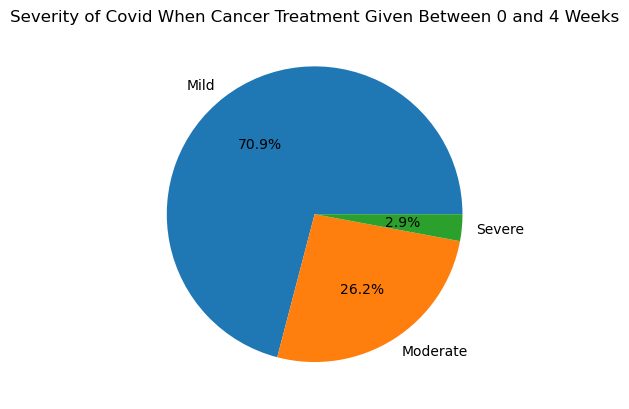

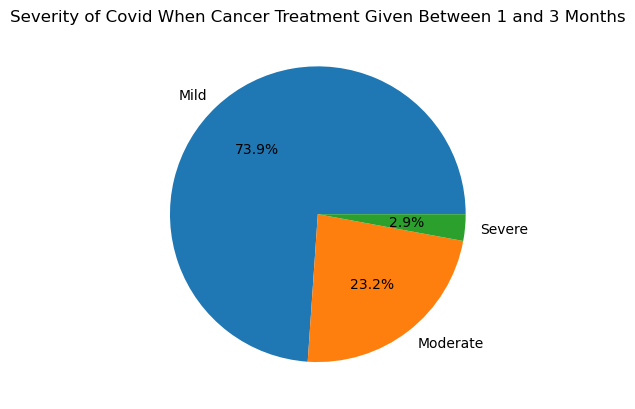

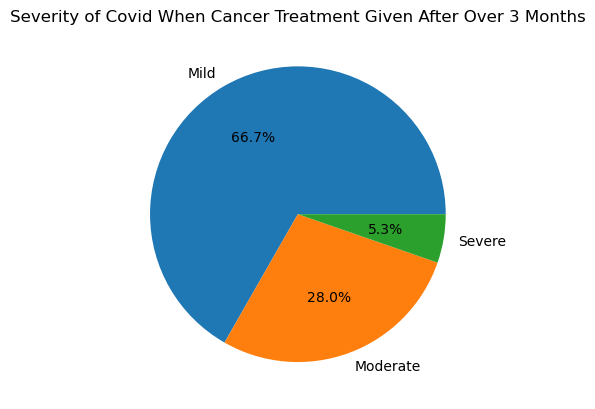

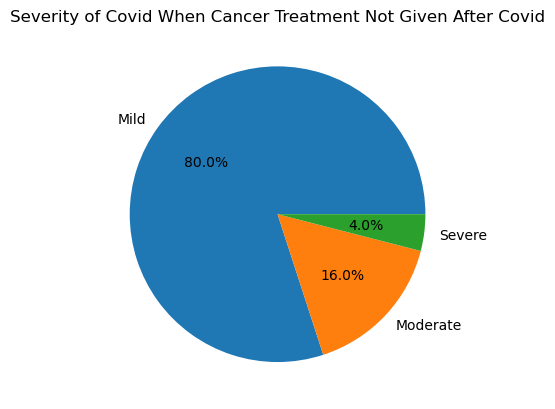

In [13]:
# Data Visualization for Comparing the timing of Cancer Treatment to their Covid Outcome - PIE CHARTS

labels = ["Mild", "Moderate", "Severe"]

# Pie Chart for O-4 Weeks
plt.pie(zero_to_four_list, labels=labels, autopct='%1.1f%%', )
# plt.ylabel("Severity")
plt.title("Severity of Covid When Cancer Treatment Given Between 0 and 4 Weeks")
plt.show()


# Pie Chart for 1-3 Months
plt.pie(one_to_three_list, labels=labels, autopct='%1.1f%%', )
# plt.ylabel("Severity")
plt.title("Severity of Covid When Cancer Treatment Given Between 1 and 3 Months")
plt.show()

# Pie Chart for Over 3 Months
plt.pie(over_three_list, labels=labels, autopct='%1.1f%%', )
# plt.ylabel("Severity")
plt.title("Severity of Covid When Cancer Treatment Given After Over 3 Months")
plt.show()

# Pie Chart for Never
plt.pie(never_list, labels=labels, autopct='%1.1f%%', )
# plt.ylabel("Severity")
plt.title("Severity of Covid When Cancer Treatment Not Given After Covid")
plt.show()

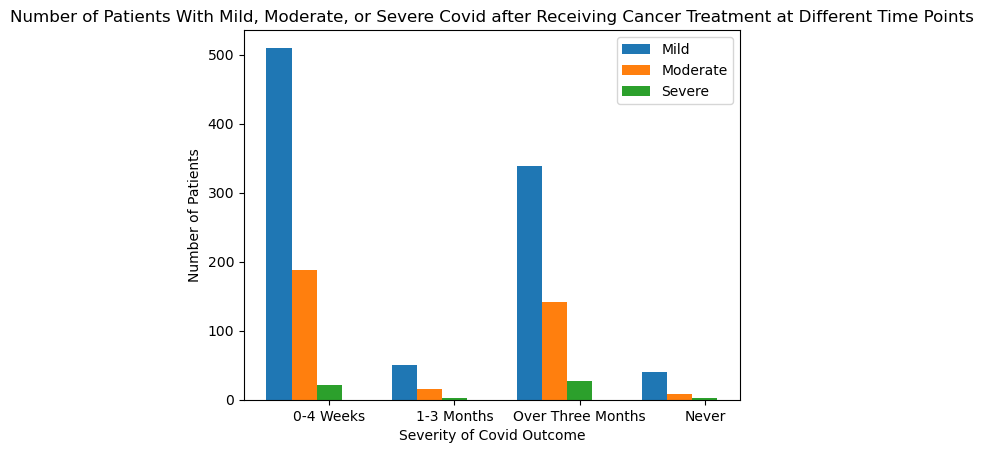

Critical Value: 7.814727903251179
Power_divergenceResult(statistic=1.28106012278355, pvalue=0.7336353757443994)
Power_divergenceResult(statistic=3.56072783792475, pvalue=0.3129709140066705)
Power_divergenceResult(statistic=1.0319299405155318, pvalue=0.7935264921404366)


In [14]:
# Complete a statistical analysis to see if there is a statistically significant difference between the  timing 
# of giving cancer treatment and the severity of COVID

# First create a bar chart to compare mild moderate and severe covid at different time points

mild = [510, 51, 339, 40]
mod = [188, 16, 142, 8]
sev = [21, 2, 27, 2]

bar_x_values = ["0-4 Weeks", "1-3 Months", "Over Three Months", "Never"]  
x_axis = np.arange(len(bar_x_values)) 
  
plt.bar(x_axis - 0.4, mild, 0.2, label = 'Mild') 
plt.bar(x_axis - 0.2, mod, 0.2, label = 'Moderate')
plt.bar(x_axis + 0, sev, 0.2, label = "Severe")
  
plt.xticks(x_axis, bar_x_values) 
plt.xlabel("Severity of Covid Outcome") 
plt.ylabel("Number of Patients") 
plt.title("Number of Patients With Mild, Moderate, or Severe Covid after Receiving Cancer Treatment at Different Time Points") 
plt.legend() 
plt.show()

# Perform a chi-squared analysis on the proportions to see if there is a statistically significant change over time

mild_timing_stats = [zero_to_four_mil, one_to_three_mil, over_three_mil, never_mil]
mild_timing_expected = (zero_to_four_mil+one_to_three_mil+over_three_mil+never_mil)/4
mild_timing_exp = [mild_timing_expected, mild_timing_expected, mild_timing_expected, mild_timing_expected]


mod_timing_stats = [zero_to_four_mod, one_to_three_mod, over_three_mod, never_mod]
mod_timing_expected = (zero_to_four_mod+one_to_three_mod+over_three_mod+never_mod)/4
mod_timing_exp = [mod_timing_expected, mod_timing_expected, mod_timing_expected, mod_timing_expected]

sev_timing_stats = [zero_to_four_sev, one_to_three_sev, over_three_sev, never_sev]
sev_timing_expected = (zero_to_four_sev+one_to_three_sev+over_three_sev+never_sev)/4
sev_timing_exp = [sev_timing_expected, sev_timing_expected, sev_timing_expected, sev_timing_expected]


timing_crit_val=st.chi2.ppf(q=0.95, df=3)

mild_timing_chi=st.chisquare(mild_timing_stats, mild_timing_exp)
mod_timing_chi=st.chisquare(mod_timing_stats, mod_timing_exp)
sev_timing_chi=st.chisquare(sev_timing_stats, sev_timing_exp)

print("Critical Value: "+ str(timing_crit_val))
print(mild_timing_chi)
print(mod_timing_chi)
print(sev_timing_chi)

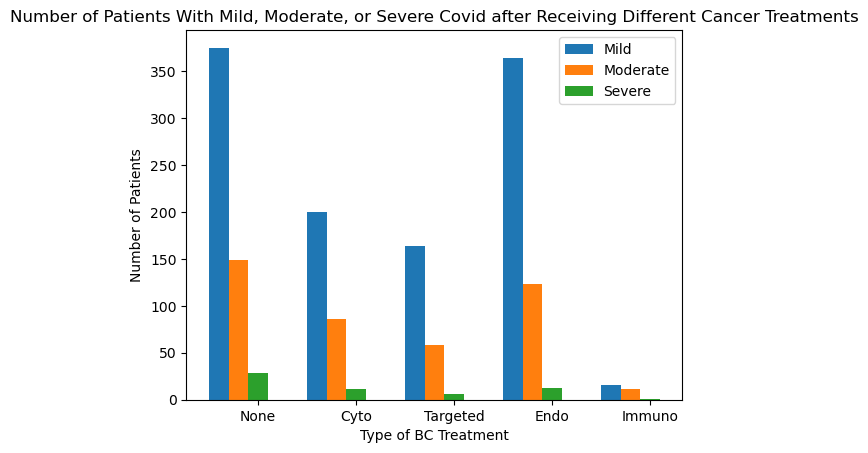

Critical Value: 9.487729036781154
Power_divergenceResult(statistic=0.35874300509279555, pvalue=0.9857132078634444)
Power_divergenceResult(statistic=0.322088093501308, pvalue=0.9883440569019923)
Power_divergenceResult(statistic=1.5612703732794935, pvalue=0.8157355645710508)


In [15]:
# Creating a dataframe to complete the analysis of how the treatment type affects COVID Outcome

treatment_df = dataset_df[["der_cancer_tx_timing_v2", "der_cancertr_none", "severity_of_covid_19_v2", "der_any_cyto", "der_any_targeted", "der_any_endo", "der_any_immuno", "der_any_local", "der_any_other"]]

# Calculating the values for the bar chart
mild_none = treatment_df[(treatment_df["severity_of_covid_19_v2"] == "Mild") & (treatment_df["der_cancertr_none"] == "Yes")]["der_cancer_tx_timing_v2"].count()
mild_cyto = treatment_df[(treatment_df["severity_of_covid_19_v2"] == "Mild") & (treatment_df["der_any_cyto"] == "Yes")]["der_cancer_tx_timing_v2"].count()
mild_targeted = treatment_df[(treatment_df["severity_of_covid_19_v2"] == "Mild") & (treatment_df["der_any_targeted"] == "Yes")]["der_cancer_tx_timing_v2"].count()
mild_endo = treatment_df[(treatment_df["severity_of_covid_19_v2"] == "Mild") & (treatment_df["der_any_endo"] == "Yes")]["der_cancer_tx_timing_v2"].count()
mild_immuno = treatment_df[(treatment_df["severity_of_covid_19_v2"] == "Mild") & (treatment_df["der_any_immuno"] == "Yes")]["der_cancer_tx_timing_v2"].count()

mod_none = treatment_df[(treatment_df["severity_of_covid_19_v2"] == "Moderate") & (treatment_df["der_cancertr_none"] == "Yes")]["der_cancer_tx_timing_v2"].count()
mod_cyto = treatment_df[(treatment_df["severity_of_covid_19_v2"] == "Moderate") & (treatment_df["der_any_cyto"] == "Yes")]["der_cancer_tx_timing_v2"].count()
mod_targeted = treatment_df[(treatment_df["severity_of_covid_19_v2"] == "Moderate") & (treatment_df["der_any_targeted"] == "Yes")]["der_cancer_tx_timing_v2"].count()
mod_endo = treatment_df[(treatment_df["severity_of_covid_19_v2"] == "Moderate") & (treatment_df["der_any_endo"] == "Yes")]["der_cancer_tx_timing_v2"].count()
mod_immuno = treatment_df[(treatment_df["severity_of_covid_19_v2"] == "Moderate") & (treatment_df["der_any_immuno"] == "Yes")]["der_cancer_tx_timing_v2"].count()

sev_none = treatment_df[(treatment_df["severity_of_covid_19_v2"] == "Severe") & (treatment_df["der_cancertr_none"] == "Yes")]["der_cancer_tx_timing_v2"].count()
sev_cyto = treatment_df[(treatment_df["severity_of_covid_19_v2"] == "Severe") & (treatment_df["der_any_cyto"] == "Yes")]["der_cancer_tx_timing_v2"].count()
sev_targeted = treatment_df[(treatment_df["severity_of_covid_19_v2"] == "Severe") & (treatment_df["der_any_targeted"] == "Yes")]["der_cancer_tx_timing_v2"].count()
sev_endo = treatment_df[(treatment_df["severity_of_covid_19_v2"] == "Severe") & (treatment_df["der_any_endo"] == "Yes")]["der_cancer_tx_timing_v2"].count()
sev_immuno = treatment_df[(treatment_df["severity_of_covid_19_v2"] == "Severe") & (treatment_df["der_any_immuno"] == "Yes")]["der_cancer_tx_timing_v2"].count()

# Creating lists for the bar chart and plotting the bar chart
mild_treatment = [mild_none, mild_cyto, mild_targeted, mild_endo, mild_immuno]
mod_treatment = [mod_none, mod_cyto, mod_targeted, mod_endo, mod_immuno]
sev_treatment = [sev_none, sev_cyto, sev_targeted, sev_endo, sev_immuno]

treatment_bar_x_values = ["None", "Cyto", "Targeted", "Endo", "Immuno"]  
treatment_x_axis = np.arange(len(treatment_bar_x_values))

plt.bar(treatment_x_axis - 0.4, mild_treatment, 0.2, label = 'Mild') 
plt.bar(treatment_x_axis - 0.2, mod_treatment, 0.2, label = 'Moderate')
plt.bar(treatment_x_axis + 0, sev_treatment, 0.2, label = "Severe")

plt.xticks(treatment_x_axis, treatment_bar_x_values) 
plt.xlabel("Type of BC Treatment") 
plt.ylabel("Number of Patients") 
plt.title("Number of Patients With Mild, Moderate, or Severe Covid after Receiving Different Cancer Treatments") 
plt.legend()
plt.show()


# Statistical analysis

# Calculate proportions
mild_total = mild_none+mild_cyto+mild_targeted+mild_endo+mild_immuno
mild_none_prop = mild_none/mild_total
mild_cyto_prop = mild_cyto/mild_total
mild_targeted_prop = mild_targeted/mild_total
mild_endo_prop = mild_endo/mild_total
mild_immuno_prop = mild_immuno/mild_total

mod_total = mod_none+mod_cyto+mod_targeted+mod_endo+mod_immuno
mod_none_prop = mod_none/mod_total
mod_cyto_prop = mod_cyto/mod_total
mod_targeted_prop = mod_targeted/mod_total
mod_endo_prop = mod_endo/mod_total
mod_immuno_prop = mod_immuno/mod_total

sev_total = sev_none+sev_cyto+sev_targeted+sev_endo+sev_immuno
sev_none_prop = sev_none/sev_total
sev_cyto_prop = sev_cyto/mod_total
sev_targeted_prop = sev_targeted/mod_total
sev_endo_prop = sev_endo/mod_total
sev_immuno_prop = sev_immuno/mod_total

# Calculate Expected and Observed Values and Put Into List
mild_treatment_stats = [mild_none_prop, mild_cyto_prop, mild_targeted_prop, mild_endo_prop, mild_immuno_prop]
mild_treatment_expected = (mild_none_prop+mild_cyto_prop+mild_targeted_prop+mild_endo_prop+mild_immuno_prop)/5
mild_treatment_exp = [mild_treatment_expected, mild_treatment_expected, mild_treatment_expected, mild_treatment_expected, mild_treatment_expected]

mod_treatment_stats = [mod_none_prop, mod_cyto_prop, mod_targeted_prop, mod_endo_prop, mod_immuno_prop]
mod_treatment_expected = (mod_none_prop+mod_cyto_prop+mod_targeted_prop+mod_endo_prop+mod_immuno_prop)/5
mod_treatment_exp = [mod_treatment_expected, mod_treatment_expected, mod_treatment_expected, mod_treatment_expected, mod_treatment_expected]

sev_treatment_stats = [sev_none_prop, sev_cyto_prop, sev_targeted_prop, sev_endo_prop, sev_immuno_prop]
sev_treatment_expected = (sev_none_prop+sev_cyto_prop+sev_targeted_prop+sev_endo_prop+sev_immuno_prop)/5
sev_treatment_exp = [sev_treatment_expected, sev_treatment_expected, sev_treatment_expected, sev_treatment_expected, sev_treatment_expected]

# Critical value 
treatment_crit_val=st.chi2.ppf(q=0.95, df=4)

# Chi square analysis
mild_treatment_chi=st.chisquare(mild_treatment_stats, mild_treatment_exp)
mod_treatment_chi=st.chisquare(mod_treatment_stats, mod_treatment_exp)
sev_treatment_chi=st.chisquare(sev_treatment_stats, sev_treatment_exp)


# Print everything
print("Critical Value: " + str(treatment_crit_val))
print(mild_treatment_chi)
print(mod_treatment_chi)
print(sev_treatment_chi)


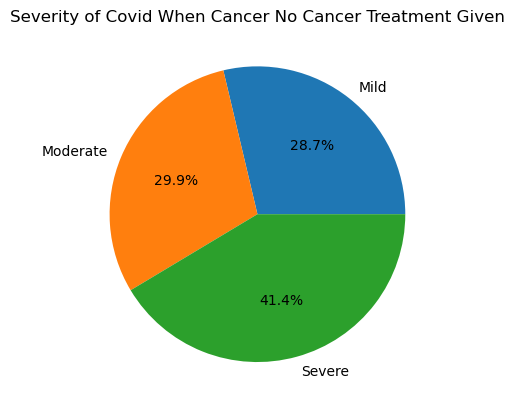

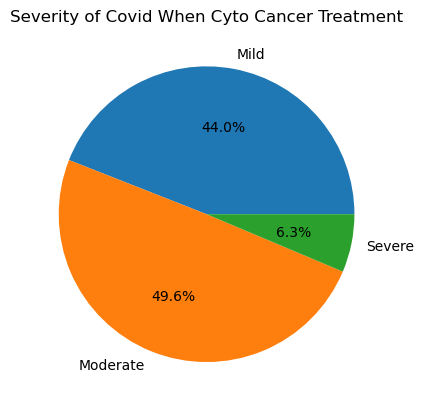

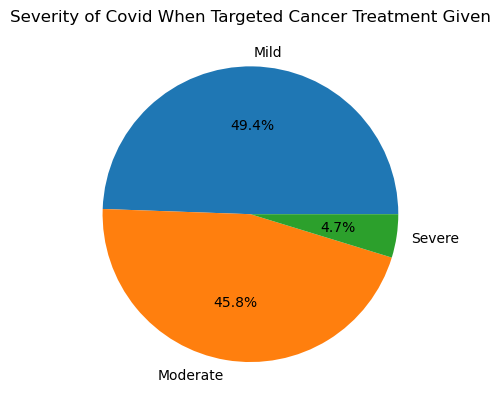

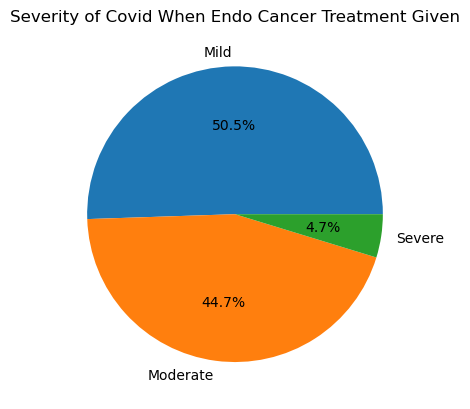

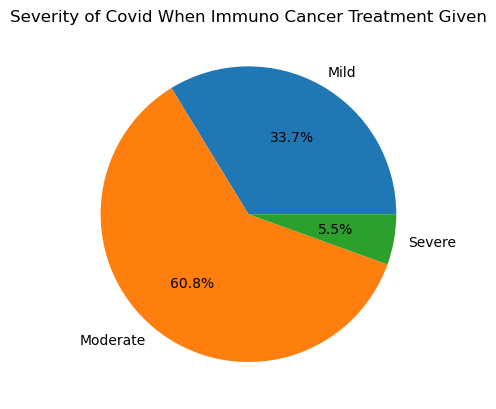

In [16]:
# Creating Pie Charts

treatment_labels = ["Mild", "Moderate","Severe"]

# Pie Chart for None
none_list = [mild_none_prop, mod_none_prop, sev_none_prop]
plt.pie(none_list, labels=treatment_labels, autopct='%1.1f%%', )
# plt.ylabel("Severity")
plt.title("Severity of Covid When Cancer No Cancer Treatment Given")
plt.show()


# Pie Chart for Cyto
cyto_list = [mild_cyto_prop, mod_cyto_prop, sev_cyto_prop]
plt.pie(cyto_list, labels=treatment_labels, autopct='%1.1f%%', )
# plt.ylabel("Severity")
plt.title("Severity of Covid When Cyto Cancer Treatment")
plt.show()

# Pie Chart for Targeted
targeted_list = [mild_targeted_prop, mod_targeted_prop, sev_targeted_prop]
plt.pie(targeted_list, labels=treatment_labels, autopct='%1.1f%%', )
# plt.ylabel("Severity")
plt.title("Severity of Covid When Targeted Cancer Treatment Given")
plt.show()

# Pie Chart for Endo
endo_list = [mild_endo_prop, mod_endo_prop, sev_endo_prop]
plt.pie(endo_list, labels=treatment_labels, autopct='%1.1f%%', )
# plt.ylabel("Severity")
plt.title("Severity of Covid When Endo Cancer Treatment Given")
plt.show()

# Pie Chart for Immuno
immuno_list = [mild_immuno_prop, mod_immuno_prop, sev_immuno_prop]
plt.pie(immuno_list, labels=treatment_labels, autopct='%1.1f%%', )
# plt.ylabel("Severity")
plt.title("Severity of Covid When Immuno Cancer Treatment Given")
plt.show()